In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [7]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


In [8]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

First 10 Train images in MNIST dataset



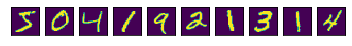


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [9]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])

In [10]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [11]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model

In [12]:
model = select_model(1)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
model.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.5738 - accuracy: 0.9411
Epoch 2/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0839 - accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.0700 - accuracy: 0.9788
Epoch 4/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0575 - accuracy: 0.9821
Epoch 5/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0500 - accuracy: 0.9847


In [16]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 1s - loss: 0.2047 - accuracy: 0.9737

Test loss :  0.11381206919174874
Test accuracy : 0.9737


In [17]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [18]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

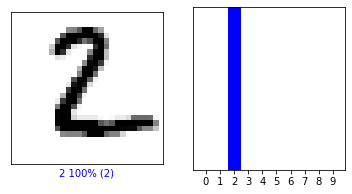

In [21]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

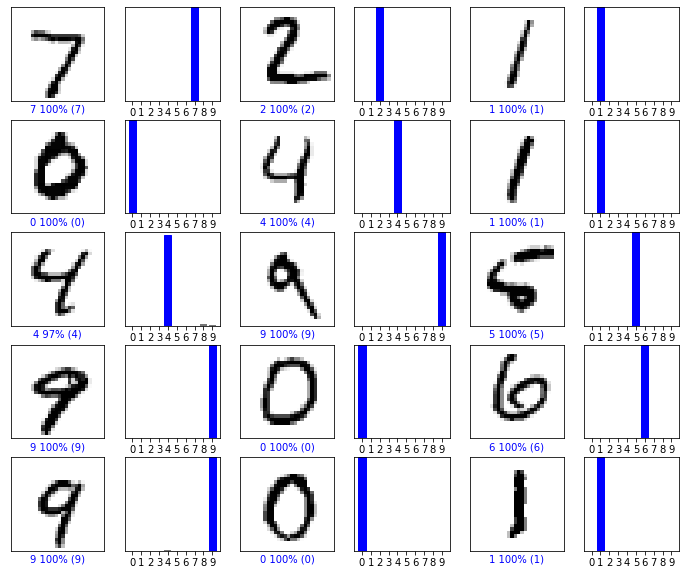

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [23]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [24]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[247, 259, 282, 321, 333, 340, 341, 445, 449, 528]


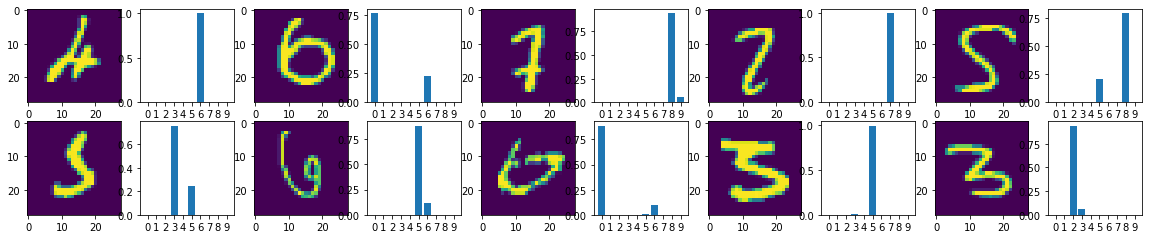

In [25]:
plot_error(index_slice, pred, test_labels)

In [ ]:
DONE